### Посилання на датасет: https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('AQI and Lat Long of Countries.csv')
data = data.dropna()
data['AQI Category'].replace({'Good':0,'Moderate':1,'Unhealthy for Sensitive Groups':2,'Unhealthy':3,
                                 'Very Unhealthy':4, 'Hazardous':5}, inplace= True)

data = data[['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value',
                   'PM2.5 AQI Value', 'AQI Category']]

data['AQI Category'] = data['AQI Category'].astype(int)
data

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0             51             1               36              0   
1             41             1                5              1   
2             41             1                5              1   
3             66             1               39              2   
4             34             1               34              0   
...          ...           ...              ...            ...   
16690         54             1               34              5   
16691         71             1               39              1   
16692         71             1               39              1   
16693         50             1               20              5   
16694         71             1               44              2   

       PM2.5 AQI Value  AQI Category  
0                   51             1  
1                   41             0  
2                   41             0  
3                   66             1  
4                   20             0  
...                ...           ...  
16690               54             1  
16691               71             1  
16692               71             1  
16693               50             0  
16694               71             1  

[16393 rows x 6 columns]

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

features = data.select_dtypes(include=['int64', 'float64']).columns
features = features.drop(['AQI Category'])

X=data.drop(['AQI Category'], axis=1)
y=data['AQI Category'].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=features)

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0       0.089249      0.007519         0.162162       0.000000   
1       0.068966      0.007519         0.022523       0.010989   
2       0.068966      0.007519         0.022523       0.010989   
3       0.119675      0.007519         0.175676       0.021978   
4       0.054767      0.007519         0.153153       0.000000   
...          ...           ...              ...            ...   
16388   0.095335      0.007519         0.153153       0.054945   
16389   0.129817      0.007519         0.175676       0.010989   
16390   0.129817      0.007519         0.175676       0.010989   
16391   0.087221      0.007519         0.090090       0.054945   
16392   0.129817      0.007519         0.198198       0.021978   

       PM2.5 AQI Value  
0                0.102  
1                0.082  
2                0.082  
3                0.132  
4                0.040  
...                ...  
16388            0.108  
16389            0.142  
16390            0.142  
16391            0.100  
16392            0.142  

[16393 rows x 5 columns]

## 1. Зниження розмірності і візуалізація даних 

### PCA

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [5]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

print('Explained variance', exp_var_pca)
print('Cumulative explained variance', cum_sum_eigenvalues)

Explained variance [0.56905593 0.32794755 0.09183598 0.00755753 0.00360301]
Cumulative explained variance [0.56905593 0.89700347 0.98883946 0.99639699 1.        ]


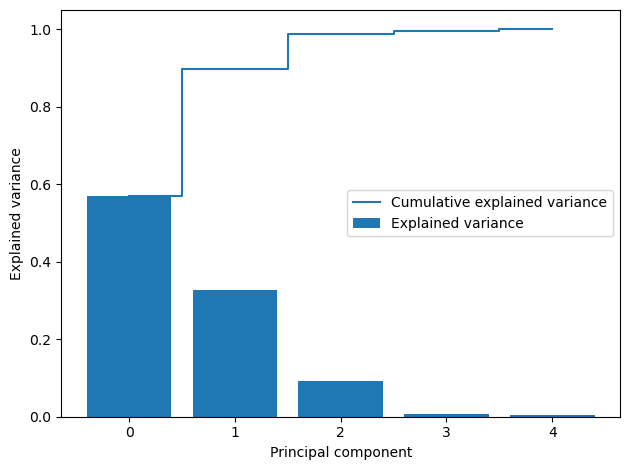

In [6]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

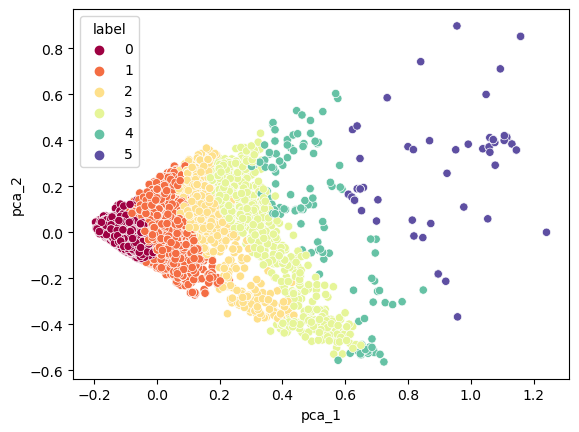

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_result_df = pd.DataFrame({'pca_1': X_pca[:,0], 'pca_2': X_pca[:,1], 'label': y})

sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, palette='Spectral')

### TSNE

<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

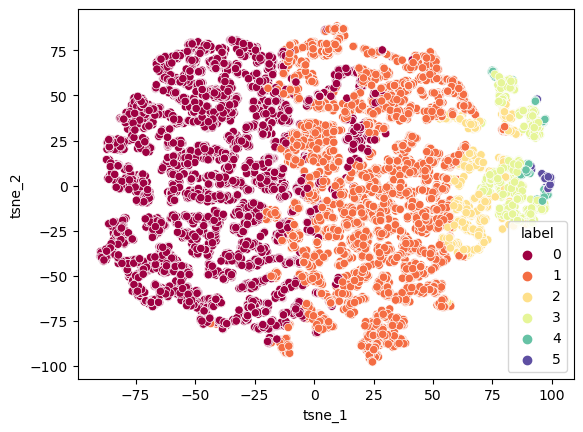

In [8]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': X_tsne[:,0], 'tsne_2': X_tsne[:,1], 'label': y})

sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, palette='Spectral')

## 2. Кластерний аналіз

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [10]:
img = plt.imread("img.jpg")

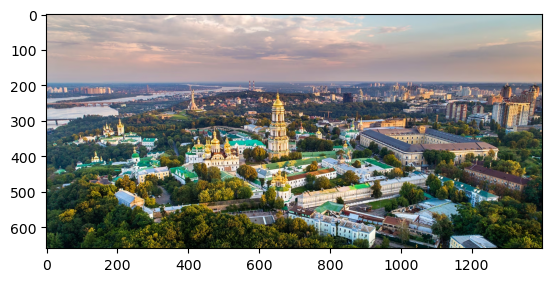

In [11]:
plt.imshow(img)

In [12]:
img = np.array(img, dtype=np.float64) / 255

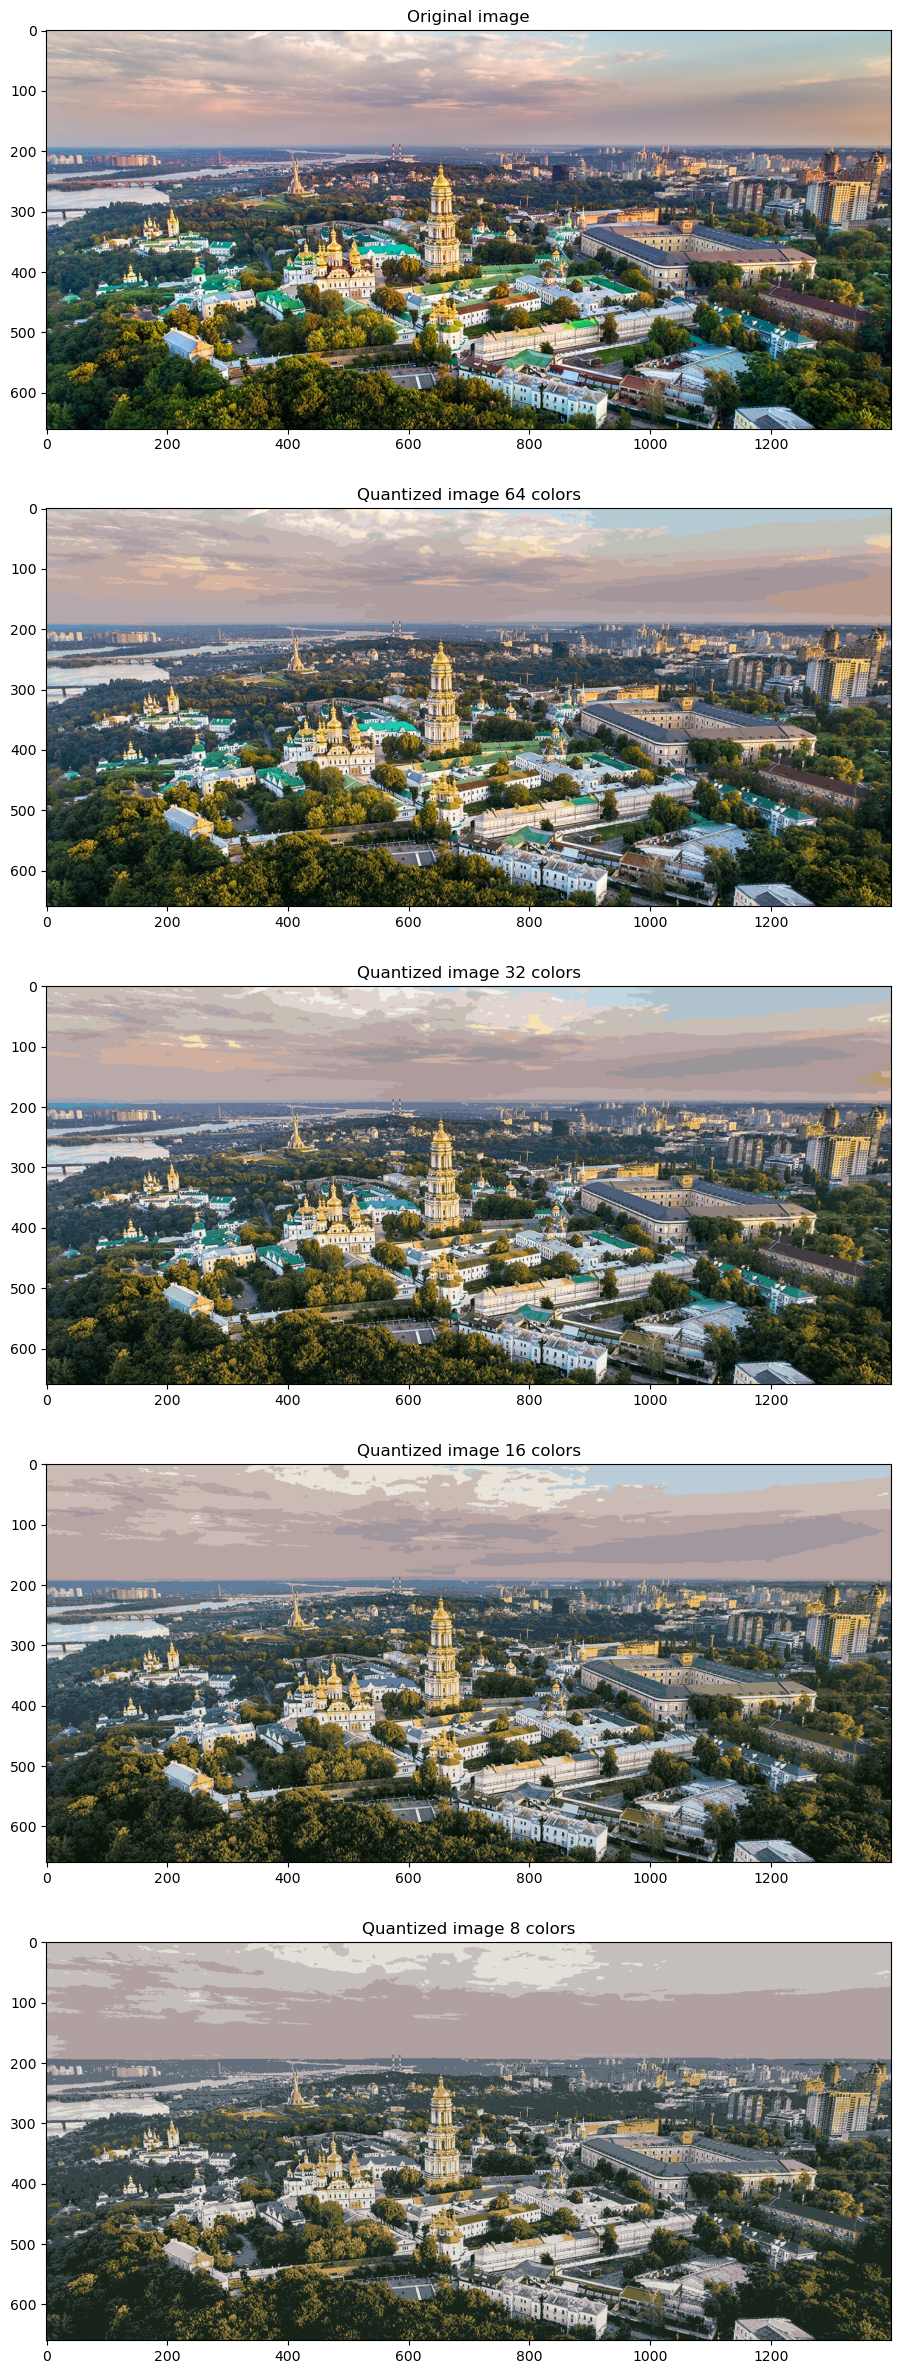

In [13]:
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))

fig, axs = plt.subplots(5, 1, figsize=(45,30))

axs[0].imshow(img)
axs[0].set_title("Original image")

for ax, n_colors in zip(axs[1:], [64, 32, 16, 8]):

    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

    # Get labels for all points
    labels = kmeans.predict(image_array)

    def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        return codebook[labels].reshape(w, h, -1)

    
    ax.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    ax.set_title(f"Quantized image {n_colors} colors")

plt.show()

## 3. Обробка та класифікація текстових даних

### Посилання на датасет: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re
import string

In [15]:
columns = ['id', 'Entity', 'Label', 'Text']
train_data = pd.read_csv('twitter_training.csv', names=columns) 
test_data = pd.read_csv('twitter_validation.csv', names=columns)

train_data

id       Entity     Label  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                    Text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [16]:
test_data

id               Entity       Label  \
0    3364             Facebook  Irrelevant   
1     352               Amazon     Neutral   
2    8312            Microsoft    Negative   
3    4371                CS-GO    Negative   
4    4433               Google     Neutral   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                                  Text  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                                                 ...  
995  ⭐️ Toronto is the arts and culture capital of ...  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
997  Today sucked so it’s time to drink wine n play...  
998  Bought a fraction of Microsoft today. Small wins.  
999  Johnson & Johnson to stop selling talc baby po...  

[1000 rows x 4 columns]

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74682 non-null  int64 
 1   Entity  74682 non-null  object
 2   Label   74682 non-null  object
 3   Text    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [18]:
train_data.isnull().sum()

id          0
Entity      0
Label       0
Text      686
dtype: int64

In [19]:
train_data.Label.value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Label, dtype: int64

In [20]:
train_data.dropna(inplace=True)

In [21]:
train_data.Label.replace(to_replace='Irrelevant', value='Neutral',inplace=True)
test_data.Label.replace(to_replace='Irrelevant', value='Neutral',inplace=True)
print(train_data.Label.value_counts())
print('\n')
print(test_data.Label.value_counts())

Neutral     30983
Negative    22358
Positive    20655
Name: Label, dtype: int64


Neutral     457
Positive    277
Negative    266
Name: Label, dtype: int64


In [22]:
train_data = train_data[['Text','Label']]
test_data = test_data[['Text','Label']]

In [23]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
def clean_text(text):
    text = text.lower()
    # remove mentions
    text = re.sub('@\S+', ' ', text)
    # remove url
    text = re.sub('https*\S+', ' ', text)
    # remove hashtags
    text = re.sub('#\S+', ' ', text)
    # remove all numbers
    text = re.sub('\d', ' ', text)
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remove extra spaces
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}', ' ', text)
    # stopwords     
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    # Tokenize the text
    words = text.split()
    # Lemmatization and remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # remove non-Latin characters
    text = ' '.join([word for word in words if word.isalpha()])

    return text

In [24]:
train_data.Text=train_data.Text.apply(clean_text)
test_data.Text=test_data.Text.apply(clean_text)
train_data

Text     Label
0                           im getting borderland murder  Positive
1                                     coming border kill  Positive
2                             im getting borderland kill  Positive
3                            im coming borderland murder  Positive
4                           im getting borderland murder  Positive
...                                                  ...       ...
74677  realized window partition mac like year behind...  Positive
74678  realized mac window partition year behind nvid...  Positive
74679  realized window partition mac year behind nvid...  Positive
74680  realized window partition mac like year behind...  Positive
74681  like window partition mac like year behind dri...  Positive

[73996 rows x 2 columns]

In [25]:
test_data

Text     Label
0    mentioned facebook struggling motivation go ru...   Neutral
1    bbc news amazon bos jeff bezos reject claim co...   Neutral
2                  pay word function poorly chromebook  Negative
3    csgo matchmaking full closet hacking truly awf...  Negative
4    president slapping american face really commit...   Neutral
..                                                 ...       ...
995  toronto art culture capital canada wonder want...   Neutral
996  actually good move tot bring viewer one people...   Neutral
997  today sucked time drink wine n play borderland...  Positive
998          bought fraction microsoft today small win  Positive
999  johnson johnson stop selling talc baby powder ...   Neutral

[1000 rows x 2 columns]

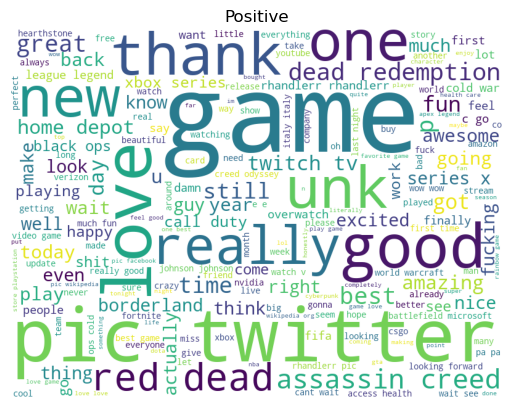

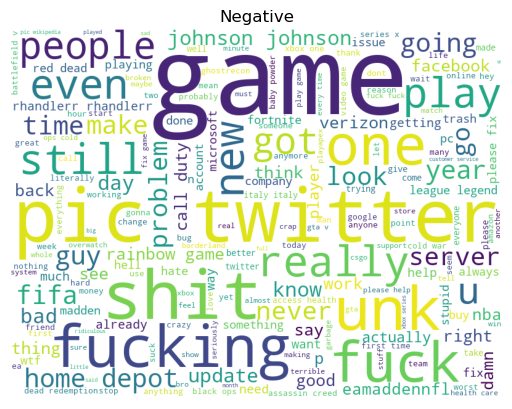

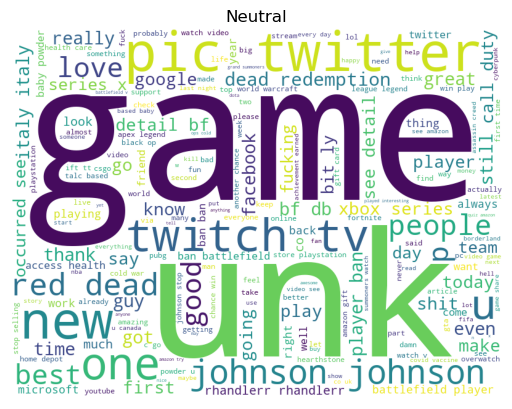

In [26]:
from wordcloud import WordCloud
def visualize(label):
    text = ''
    for msg in train_data[train_data['Label'] == label]['Text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.title(label)
    plt.axis('off')
    plt.show()

visualize('Positive')
visualize('Negative')
visualize('Neutral')

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train_data['Text'])
X_test = vectorizer.transform(test_data['Text'])

y_train = train_data.Label
y_test =  test_data.Label

accuracy score 0.9
              precision    recall  f1-score   support

    Negative       0.90      0.91      0.90       266
     Neutral       0.91      0.91      0.91       457
    Positive       0.89      0.87      0.88       277

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



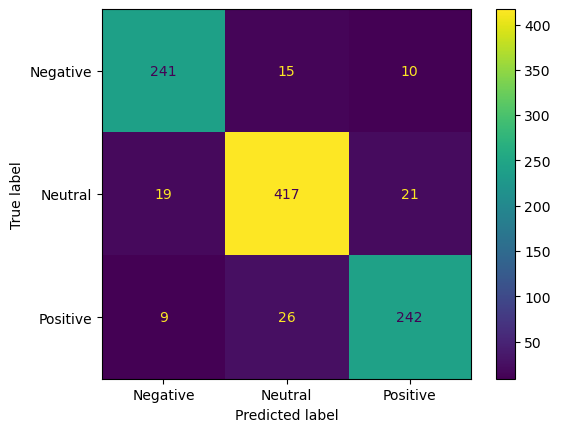

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classifier = LogisticRegression(max_iter=100).fit(X_train,y_train)

y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print('accuracy score', accuracy_score(y_test, y_pred))
print(report)
cm = confusion_matrix(y_test, y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Negative','Neutral','Positive'])
cm_display.plot()

accuracy score 0.872
              precision    recall  f1-score   support

    Negative       0.83      0.89      0.86       266
     Neutral       0.92      0.86      0.89       457
    Positive       0.84      0.87      0.85       277

    accuracy                           0.87      1000
   macro avg       0.86      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



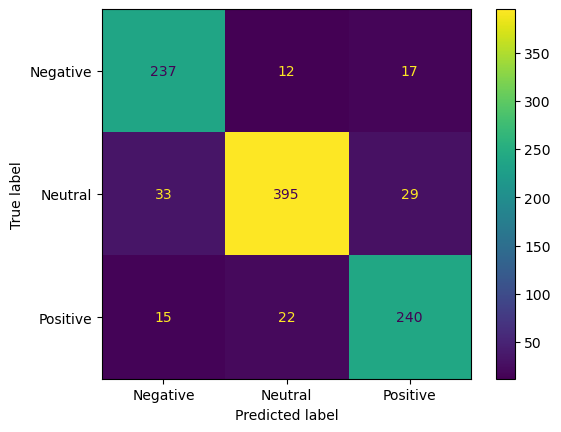

In [29]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1).fit(X_train, y_train)

y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print('accuracy score', accuracy_score(y_test, y_pred))
print(report)
cm = confusion_matrix(y_test, y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Negative','Neutral','Positive'])
cm_display.plot()